# First Order Equations

### solve equation
$$
\frac{dy}{dx} = -(y + 1)(y - 1)
$$
$$
\frac{dy}{dx} = -y^2
$$
$$
\frac{dy}{dx} = -y^2 - 1
$$

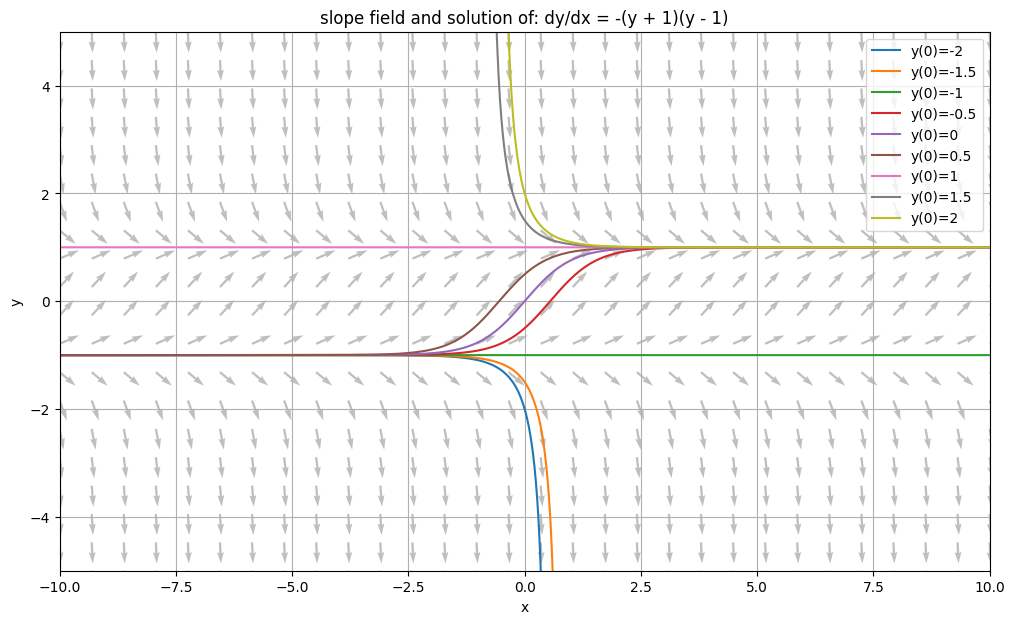

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def dydx(x, y):
    return -(y+1)*(y-1)

# x from -10 to 10, 30 points together (for drawing the arrows)
# y from -5 to 5, 20 points together
x = np.linspace(-10, 10, 30)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
U = 1 # this is dx
V = dydx(X, Y) # this is dy
N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N # normalize to unit vector

plt.figure(figsize=(12, 7))
# draw slope fields
# starting point:(x, y), direction: (U2, V2)
plt.quiver(X, Y, U2, V2, angles="xy", color="gray", alpha=0.5)
plt.title("slope field and solution of: dy/dx = -(y + 1)(y - 1)")
plt.xlabel("x")
plt.ylabel("y")

# multi initial value
y0_list = [-2,-1.5,-1,-0.5,0,0.5,1,1.5,2]
for y0 in y0_list:
    # Solve IVP (Initial Value Problem)
    # sovle_ivp(ODE, span, initial value, output coordinate, Runge-Kutta)
    sol_fwd = solve_ivp(dydx, [0, 10], [y0], t_eval=np.linspace(0, 10, 1000))
    sol_bwd = solve_ivp(dydx, [0, -10], [y0], t_eval=np.linspace(0, -10, 1000))

    # combine the forward and backward solution
    t_full = np.concatenate((sol_bwd.t[::-1], sol_fwd.t))
    y_full = np.concatenate((sol_bwd.y[0][::-1], sol_fwd.y[0]))

    plt.plot(t_full, y_full, label=f"y(0)={y0}")

plt.grid(True)
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-5, 5)
plt.show()


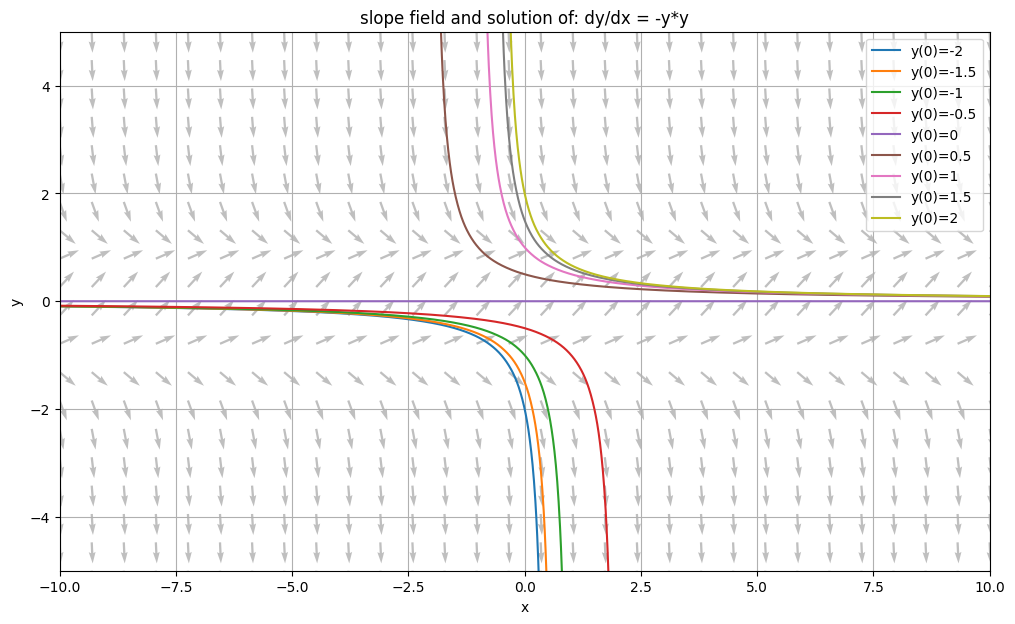

In [41]:
def dydx2(x, y):
    return -y*y

# x from -10 to 10, 30 points together (for drawing the arrows)
# y from -5 to 5, 20 points together
x = np.linspace(-10, 10, 30)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
U = 1 # this is dx
V = dydx(X, Y) # this is dy
N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N # normalize to unit vector

plt.figure(figsize=(12, 7))
# draw slope fields
# starting point:(x, y), direction: (U2, V2)
plt.quiver(X, Y, U2, V2, angles="xy", color="gray", alpha=0.5)
plt.title("slope field and solution of: dy/dx = -y*y")
plt.xlabel("x")
plt.ylabel("y")

# multi initial value
y0_list = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
for y0 in y0_list:
    # Solve IVP (Initial Value Problem)
    # sovle_ivp(ODE, span, initial value, output coordinate, Runge-Kutta)
    sol_fwd = solve_ivp(dydx2, [0, 10], [y0], t_eval=np.linspace(0, 10, 1000))
    sol_bwd = solve_ivp(dydx2, [0, -10], [y0], t_eval=np.linspace(0, -10, 1000))

    # combine the forward and backward solution
    t_full = np.concatenate((sol_bwd.t[::-1], sol_fwd.t))
    y_full = np.concatenate((sol_bwd.y[0][::-1], sol_fwd.y[0]))

    plt.plot(t_full, y_full, label=f"y(0)={y0}")

plt.grid(True)
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-5, 5)
plt.show()


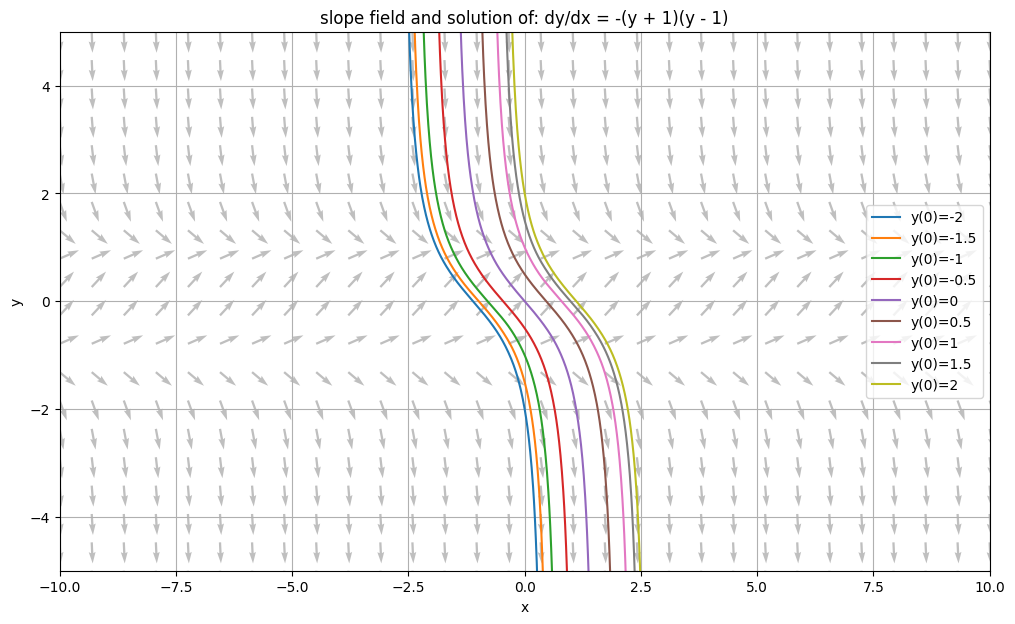

In [40]:
def dydx3(x, y):
    return -y*y - 1

# x from -10 to 10, 30 points together (for drawing the arrows)
# y from -5 to 5, 20 points together
x = np.linspace(-10, 10, 30)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
U = 1 # this is dx
V = dydx(X, Y) # this is dy
N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N # normalize to unit vector

plt.figure(figsize=(12, 7))
# draw slope fields
# starting point:(x, y), direction: (U2, V2)
plt.quiver(X, Y, U2, V2, angles="xy", color="gray", alpha=0.5)
plt.title("slope field and solution of: dy/dx = -y*y-1")
plt.xlabel("x")
plt.ylabel("y")

# multi initial value
y0_list = [-2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2]
for y0 in y0_list:
    # Solve IVP (Initial Value Problem)
    # sovle_ivp(ODE, span, initial value, output coordinate, Runge-Kutta)
    sol_fwd = solve_ivp(dydx3, [0, 10], [y0], t_eval=np.linspace(0, 10, 1000))
    sol_bwd = solve_ivp(dydx3, [0, -10], [y0], t_eval=np.linspace(0, -10, 1000))

    # combine the forward and backward solution
    t_full = np.concatenate((sol_bwd.t[::-1], sol_fwd.t))
    y_full = np.concatenate((sol_bwd.y[0][::-1], sol_fwd.y[0]))

    plt.plot(t_full, y_full, label=f"y(0)={y0}")

plt.grid(True)
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-5, 5)
plt.show()
